# Analysis of Apartmets for Sale in Baku

---------------------------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data.csv', converters={'Locations': pd.eval})
df.head(5)

,ID,Seller,Category,Locations,Price,Currency,Rooms,Area,Floor
0,2827728,Owner,Kohna tikili,"[Memar Acami m., Nasimi r., 4-cu mikrorayon q.]",89500,AZN,2,45.0,3
1,2760725,Agentlik,Yeni tikili,"[Binaqadi r., Bilacari q.]",75653,AZN,2,72.1,2
2,2872711,Owner,Yeni tikili,[Narimanov r.],155000,AZN,2,97.0,9
3,2881028,Agentlik,Yeni tikili,[Xatai r.],86500,AZN,2,71.0,5
4,2898312,Owner,Kohna tikili,"[Nizami r., 8-ci kilometr q.]",85000,AZN,2,45.0,2


In [3]:
pd.set_option('display.max_rows', None) # to display all rows completely

In [4]:
df.describe()

,ID,Price,Rooms,Area,Floor
count,2.784900e+04,2.784900e+04,27849.00000,27849.000000,27849.000000
mean,2.830468e+06,2.048658e+05,2.82854,119.518934,8.024848
std,2.217638e+05,1.829435e+05,0.95033,1259.504222,4.969964
min,2.494300e+04,9.900000e+01,1.00000,12.000000,1.000000
25%,2.840979e+06,1.100000e+05,2.00000,70.000000,4.000000
50%,2.887768e+06,1.580000e+05,3.00000,96.200000,7.000000
75%,2.903138e+06,2.400000e+05,3.00000,135.000000,12.000000
max,2.917435e+06,4.665000e+06,19.00000,161000.000000,27.000000


#### Remove duplicate rows if they exist

In [5]:
if len(df) - len(df['ID'].unique()) != 0:
    df = df.drop_duplicates(subset=['ID'])

#### Convert prices in USD to AZN if they exist

In [6]:
if 'USD' in df['Currency'].unique():
    df.loc[df['Currency'] == 'USD', 'Price'] = df['Price']*1.7
    df.loc[df['Currency'] == 'USD', 'Currency'] = 'AZN'

In [7]:
# df['Locations'].explode().value_counts()

In [8]:
# locs = df['Locations'].explode().value_counts()

# locs = dict(locs)
# lists = sorted(locs.items()) # sorted by key, return a list of tuples
# x, y = zip(*lists) # unpack a list of pairs into two tuples

# plt.figure(figsize=(10,20))
# plt.barh(x, y)
# plt.title("Num of Houses in each region")
# plt.xlabel("Counts")
# plt.ylabel("Regions")
# plt.show()

#### Add new column with prices per square meter

In [9]:
df['PPSM'] = (df['Price']/df['Area']).astype(int) # Price Per Square Meter

#### Add new columns Station, Region and District for each row

In [10]:
def get_station(loc):
    for x in loc:
        if 'm.' in x:
            return x
    return np.nan

df['Station'] = df['Locations'].apply(lambda x: get_station(x))

In [11]:
def get_region(loc):
    for x in loc:
        if 'r.' in x:
            return x
    return np.nan

df['Region'] = df['Locations'].apply(lambda x: get_region(x))

In [12]:
def get_district(loc):
    for x in loc:
        if 'q.' in x:
            return x
    return np.nan

df['District'] = df['Locations'].apply(lambda x: get_district(x))

In [13]:
df.head(5)

,ID,Seller,Category,Locations,Price,Currency,Rooms,Area,Floor,PPSM,Station,Region,District
0,2827728,Owner,Kohna tikili,"[Memar Acami m., Nasimi r., 4-cu mikrorayon q.]",89500,AZN,2,45.0,3,1988,Memar Acami m.,Nasimi r.,4-cu mikrorayon q.
1,2760725,Agentlik,Yeni tikili,"[Binaqadi r., Bilacari q.]",75653,AZN,2,72.1,2,1049,NaN,Binaqadi r.,Bilacari q.
2,2872711,Owner,Yeni tikili,[Narimanov r.],155000,AZN,2,97.0,9,1597,NaN,Narimanov r.,NaN
3,2881028,Agentlik,Yeni tikili,[Xatai r.],86500,AZN,2,71.0,5,1218,NaN,Xatai r.,NaN
4,2898312,Owner,Kohna tikili,"[Nizami r., 8-ci kilometr q.]",85000,AZN,2,45.0,2,1888,NaN,Nizami r.,8-ci kilometr q.


In [14]:
# regions_counts = df['Region'].value_counts()
# districts_counts = df['District'].value_counts()

## Analysis by Stations

### Q1. Where are the most and least apartments for sale?

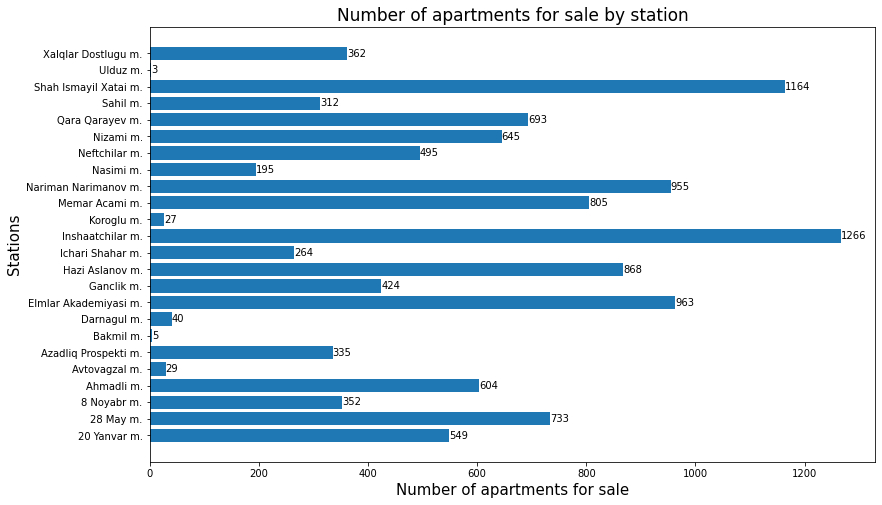

In [15]:
stations_counts = df['Station'].value_counts()
x, y = zip(*sorted(dict(stations_counts).items()))

plt.figure(figsize=(13,8))
bars = plt.barh(x, y)
plt.bar_label(bars, y)
plt.title("Number of apartments for sale by station", size=17)
plt.xlabel("Number of apartments for sale", size=15)
plt.ylabel("Stations", size=15)
plt.show()

The graph shows that most apartments are sold near 'Inshaatchilar' station (1266), the least near 'Ulduz' station (3).

### Q2. Where the most expensive and cheapest apartments are sold per square meter?

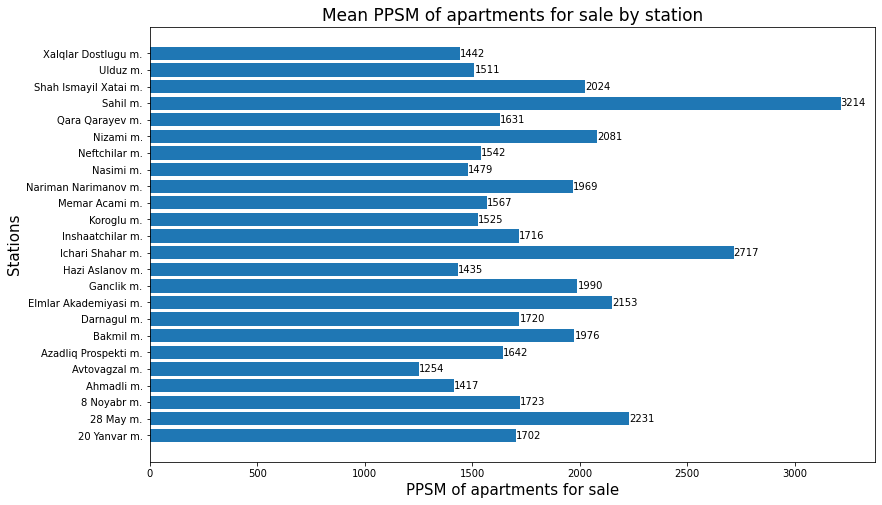

In [16]:
stations_prices = df.groupby('Station').mean()['PPSM'].astype(int)

x, y = zip(*sorted(dict(stations_prices).items()))

plt.figure(figsize=(13,8))
bars = plt.barh(x, y)
plt.bar_label(bars, y)
plt.title("Mean PPSM of apartments for sale by station", size=17)
plt.xlabel("PPSM of apartments for sale", size=15)
plt.ylabel("Stations", size=15)

plt.show()

According to the schedule, we can conclude that the most expensive apartments are sold near 'Sahil' station (average price 3214 AZN per square meter), and the cheapest ones near Avtovagzal station (average price 1254 AZN per square meter).

### Q3.

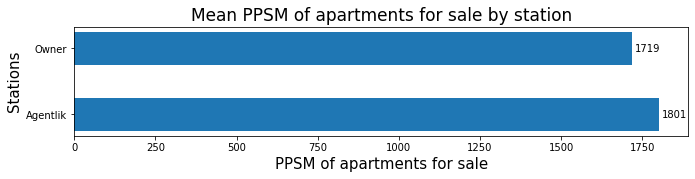

In [120]:
seller_types = df.groupby('Seller')['PPSM'].mean().astype(int)

x, y = zip(*sorted(dict(seller_types).items()))

plt.figure(figsize=(11,2))
bars = plt.barh(x, y, height=0.5)
plt.bar_label(bars, y, padding=3)
plt.title("Mean PPSM of apartments for sale by station", size=17)
plt.xlabel("PPSM of apartments for sale", size=15)
plt.ylabel("Stations", size=15)

plt.show()

In [84]:
seller_types_by_station = df.groupby(['Seller', 'Station'])['PPSM'].mean().astype(int)

agent = dict(seller_types_by_station['Agentlik'])
owner = dict(seller_types_by_station['Owner'])

def filldict(list_of_dicts):
    fulllist = df['Station'].dropna().unique()
    for key in fulllist:
        for idict in list_of_dicts:
            if key not in list(idict.keys()):
                idict[key] = 0
    return list_of_dicts

filldict([agent, owner]);

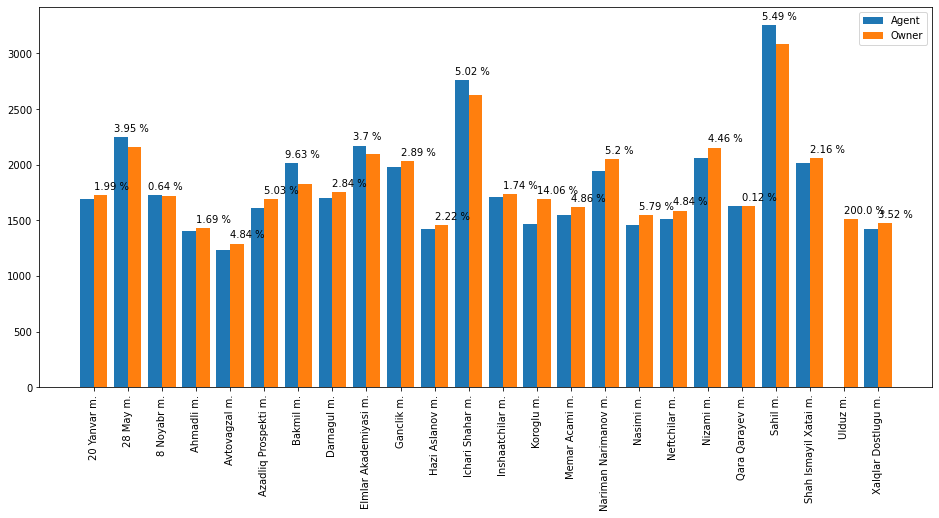

In [139]:
ax, ay = zip(*sorted(agent.items()))
ox, oy = zip(*sorted(owner.items()))

x = np.arange(len(df['Station'].dropna().unique()))
width = 0.4

plt.figure(figsize=(16,7))
bar1 = plt.bar(x-0.2, ay, width, label="Agent")
bar2 = plt.bar(x+0.2, oy, width, label="Owner")

for b1, b2 in zip(bar1, bar2):
    h1, h2 = b1.get_height(), b2.get_height()
    persentage = round(abs(h1-h2) / np.mean([h1, h2]) * 100, 2)
    if h1 > h2:
        w = b1.get_width()
        x0, y0 = b1.xy
        x, y = x0,y0+h1
        plt.annotate(f'{persentage} %', (x, y+50))
    else:
        w = b2.get_width()
        x0, y0 = b2.xy
        x, y = x0,y0+h2
        plt.annotate(f'{persentage} %', (x, y+50))
        
plt.xticks(x, ax, rotation="vertical")
plt.legend()

plt.show()